Paquetes necesarios

In [81]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt

Inicializaciones

In [82]:
#Dimensiones de la imagen a crear
ancho = 800
alto = 800

TAREA: Crea una imagen, p.e. de 800x800 píxeles, con la textura del tablero de ajedrez

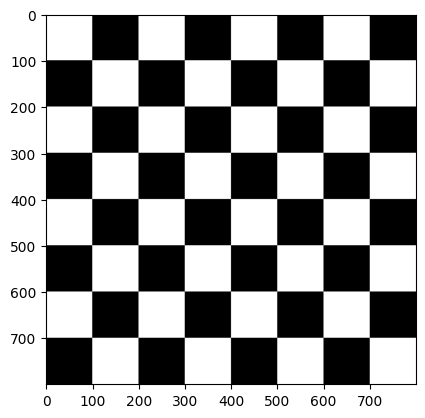

In [83]:
# Creamos una imagen en escala de grises de tamaño 800x800 píxeles, inicializada a ceros (negro)
gris_img = np.zeros((alto,ancho,1), dtype = np.uint8)

# Recorremos la imagen en bloques de 100x100 píxeles para crear el patrón de tablero de ajedrez
for i in range(0,800,100):
    for j in range(0,800,100):
        # Si la suma de los índices de bloque es par, pintamos el bloque de blanco
        if ((i + j) // 100) % 2 == 0:
            gris_img[i:i+100, j:j+100] = 255

plt.imshow(gris_img, cmap='gray')
plt.show()

TAREA: Crear una imagen estilo Mondrian (un ejemplo https://www3.gobiernodecanarias.org/medusa/ecoescuela/sa/2017/04/17/descubriendo-a-mondrian/ ) con las funciones de dibujo de OpenCV

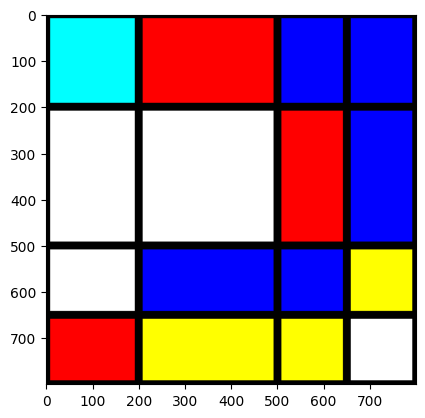

In [84]:
#Crea una imagen con tres planos
color_img = np.zeros((alto,ancho,3), dtype = np.uint8)

# Dibuja los rectángulos de colores principales estilo Mondrian
cv2.rectangle(color_img, (0, 0), (200, 200), (0, 255, 255), -1)      
cv2.rectangle(color_img, (200, 0), (500, 200), (255, 0, 0), -1)      
cv2.rectangle(color_img, (500, 0), (800, 200), (0, 0, 255), -1)      
cv2.rectangle(color_img, (0, 200), (200, 500), (255, 255, 255), -1)  
cv2.rectangle(color_img, (200, 200), (500, 500), (255, 255, 255), -1)
cv2.rectangle(color_img, (500, 200), (650, 500), (255, 0, 0), -1)    
cv2.rectangle(color_img, (650, 200), (800, 500), (0, 0, 255), -1)    
cv2.rectangle(color_img, (0, 500), (200, 650), (255, 255, 255), -1)  
cv2.rectangle(color_img, (200, 500), (650, 650), (0, 0, 255), -1)    
cv2.rectangle(color_img, (650, 500), (800, 650), (255, 255, 0), -1)  
cv2.rectangle(color_img, (0, 650), (200, 800), (255, 0, 0), -1)      
cv2.rectangle(color_img, (200, 650), (650, 800), (255, 255, 0), -1)  
cv2.rectangle(color_img, (650, 650), (800, 800), (255, 255, 255), -1)

# Dibuja líneas negras gruesas para simular el estilo Mondrian
thickness = 15
for x in [0, 200, 500, 650, 800]:
    cv2.line(color_img, (x, 0), (x, 800), (0, 0, 0), thickness)
for y in [0, 200, 500, 650, 800]:
    cv2.line(color_img, (0, y), (800, y), (0, 0, 0), thickness)

plt.imshow(color_img) 
plt.show()

TAREA: Modifica de forma libre los valores de un plano de la imagen

In [ ]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if ret:
        # Separamos los tres canales de color (BGR)
        b = frame[:,:,0]
        g = frame[:,:,1]
        r = frame[:,:,2]
       
        # Aumentamos la intensidad del canal rojo en toda la imagen
        r[:,:] += 140

        # Volvemos a combinar los canales para formar la imagen modificada
        frame_mod = cv2.merge((b, g, r))
        
        cv2.imshow('Rojo intenso', frame_mod)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

TAREA:
Pintar círculos en las posiciones del píxel más claro y oscuro de la imagen 
¿Si quisieras hacerlo sobre la zona 8x8 más clara/oscura?

In [ ]:
vid = cv2.VideoCapture(0)

while True:
    ret, frame = vid.read()
    if ret:
        # Convertimos el frame a escala de grises para facilitar el análisis de intensidad
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Buscamos el píxel más oscuro y el más claro en la imagen
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(gray)

        # Dibujamos un círculo azul en la posición del píxel más oscuro
        cv2.circle(frame, min_loc, 15, (255,0,0), 2)
        # Dibujamos un círculo rojo en la posición del píxel más claro
        cv2.circle(frame, max_loc, 15, (0,0,255), 2)

        cv2.imshow('Circulos en pixel mas claro y oscuro', frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

In [ ]:
vid = cv2.VideoCapture(0)
block = 8

while True:
    ret, frame = vid.read()
    if ret:
        # Convertimos el frame a escala de grises para analizar la intensidad
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        h, w = gray.shape

        # Ajustamos las dimensiones para que sean múltiplos del tamaño de bloque
        h2, w2 = h - h % block, w - w % block
        gray_cropped = gray[:h2, :w2]

        # Dividimos la imagen en bloques de 8x8 y sumamos la intensidad de cada bloque
        blocks = gray_cropped.reshape(h2 // block, block, w2 // block, block).sum(axis=(1, 3))

        # Buscamos el índice del bloque más oscuro y más claro
        min_idx = np.unravel_index(np.argmin(blocks), blocks.shape)
        max_idx = np.unravel_index(np.argmax(blocks), blocks.shape)

        # Calculamos la posición central de cada bloque para dibujar los círculos
        min_pos = (min_idx[1]*block + block//2, min_idx[0]*block + block//2)
        max_pos = (max_idx[1]*block + block//2, max_idx[0]*block + block//2)

        # Dibujamos un círculo azul en el bloque más oscuro y uno rojo en el más claro
        cv2.circle(frame, min_pos, 15, (255,0,0), 2)
        cv2.circle(frame, max_pos, 15, (0,0,255), 2)
        cv2.imshow('Círculos en bloque 8x8 más claro y oscuro', frame)
        
    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()

TAREA: Llevar a cabo una propuesta propia de pop art

In [ ]:
vid = cv2.VideoCapture(0)

pop_colors = [
    (255, 0, 0),
    (0, 255, 0),
    (0, 0, 255),
    (255, 255, 0),
    (255, 0, 255),
    (0, 255, 255),
    (255, 128, 0),
    (128, 0, 255)
]

block_size = 5

while True:
    ret, frame = vid.read()
    if ret:
        # Obtenemos las dimensiones y recortamos la imagen para que sean múltiplos del tamaño de bloque
        h, w, _ = frame.shape
        h2, w2 = h - h % block_size, w - w % block_size
        frame_cropped = frame[:h2, :w2]

        # Creamos una imagen vacía para el resultado pop art
        pop_frame = np.zeros_like(frame_cropped)

        # Convertimos el frame a escala de grises para analizar la intensidad
        gray = cv2.cvtColor(frame_cropped, cv2.COLOR_BGR2GRAY)

        # Recorremos la imagen por bloques
        for i in range(0, h2, block_size):
            for j in range(0, w2, block_size):
                block = gray[i:i+block_size, j:j+block_size]
                mean_intensity = np.mean(block)
                # Seleccionamos el color de la paleta según la intensidad media del bloque
                color_idx = int((mean_intensity / 255) * (len(pop_colors)-1))
                color = pop_colors[color_idx]
                # Pintamos el bloque con el color seleccionado
                pop_frame[i:i+block_size, j:j+block_size] = color

        cv2.imshow('Pop Art Mosaico', pop_frame)

    if cv2.waitKey(20) == 27:
        break

vid.release()
cv2.destroyAllWindows()